<a href="https://colab.research.google.com/github/SIluk13/G-Colaboratory-Project/blob/main/dc_timepd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
from matplotlib import pyplot
data_PD = pd.read_csv('/content/c12.csv')
data_PD.head(10)

,ProID,Info,Unnamed: 2,time,Vol.,Unnamed: 5
0,GenTime,2022-06-18 07:44,NaN,0.000000e+00,-0.0020,NaN
1,FileName,c12.csv,NaN,4.000000e-09,-0.0006,NaN
2,Record Length,7000.000000 Points,NaN,8.000000e-09,-0.0024,NaN
3,Sample Interval,4.000000e-09 s,NaN,1.200000e-08,-0.0006,NaN
4,Trigger Time,0.000000e+00 S,NaN,1.600000e-08,-0.0014,NaN
5,Source,CH1,NaN,2.000000e-08,-0.0020,NaN
6,Vertical Units,V/grid,NaN,2.400000e-08,-0.0006,NaN
7,Vertical Scale,1.000000e-02,NaN,2.800000e-08,-0.0024,NaN
8,Vertical Offset,4.400000e+01,NaN,3.200000e-08,-0.0006,NaN
9,Horizontal Units,s/grid,NaN,3.600000e-08,-0.0010,NaN


In [43]:
trPD = pd.DataFrame(data_PD, columns=['time', 'Vol.'])
trPD.head(10)

,time,Vol.
0,0.000000e+00,-0.0020
1,4.000000e-09,-0.0006
2,8.000000e-09,-0.0024
3,1.200000e-08,-0.0006
4,1.600000e-08,-0.0014
5,2.000000e-08,-0.0020
6,2.400000e-08,-0.0006
7,2.800000e-08,-0.0024
8,3.200000e-08,-0.0006
9,3.600000e-08,-0.0010


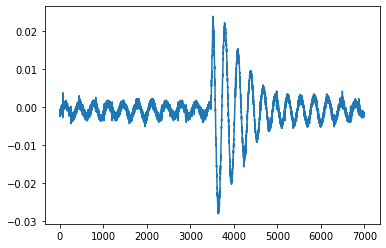

In [44]:
trPD['Vol.'].plot()

In [46]:
print(max(trPD['Vol.']))

0.024


In [49]:
status_pd = ['pd']*len(trPD['Vol.'])
trpd = pd.DataFrame(list(zip(list(data_PD['time']*1000000),list(data_PD['Vol.']*1000),status_pd)))
trpd.columns = ['Times(us)','Amplitude(mV)','Status']

In [50]:
trpd.head()

,Times(us),Amplitude(mV),Status
0,0.000,-2.0,pd
1,0.004,-0.6,pd
2,0.008,-2.4,pd
3,0.012,-0.6,pd
4,0.016,-1.4,pd


In [62]:
PD_positif = trpd[((trpd['Amplitude(mV)'] > 2) & trpd['Status'].isin(['pd']))]

In [63]:
print(PD_positif)

      Times(us)  Amplitude(mV) Status
66        0.264            3.8     pd
444       1.776            3.0     pd
459       1.836            2.2     pd
823       3.292            2.6     pd
1759      7.036            2.2     pd
...         ...            ...    ...
6506     26.024            2.2     pd
6514     26.056            2.6     pd
6516     26.064            2.2     pd
6794     27.176            2.2     pd
6873     27.492            2.2     pd

[859 rows x 3 columns]


In [64]:
maxPD_positif = max(PD_positif['Amplitude(mV)'])
minPD_positif = min(PD_positif['Amplitude(mV)'])
print('maxPD_positif:  ', maxPD_positif,'mV')
print('minPD_positif:  ', minPD_positif,'mV')
print('deltaPD_positif: ',maxPD_positif-minPD_positif,'mV')
print('Jumlah PD Positif: ', len(PD_positif))


maxPD_positif:   24.0 mV
minPD_positif:   2.2 mV
deltaPD_positif:  21.8 mV
Jumlah PD Positif:  859


In [66]:
PD_negatif = trpd[((trpd['Amplitude(mV)'] < -2) & trpd['Status'].isin(['pd']))]
print(PD_negatif)

      Times(us)  Amplitude(mV) Status
2         0.008           -2.4     pd
7         0.028           -2.4     pd
65        0.260           -2.8     pd
217       0.868           -2.4     pd
222       0.888           -2.4     pd
...         ...            ...    ...
6987     27.948           -2.4     pd
6989     27.956           -2.4     pd
6993     27.972           -2.4     pd
6996     27.984           -2.4     pd
6998     27.992           -2.4     pd

[2153 rows x 3 columns]


In [67]:
maxPD_negatif = max(PD_negatif['Amplitude(mV)'])
minPD_negatif = min(PD_negatif['Amplitude(mV)'])
print('maxPD_negatif:  ', maxPD_negatif,'mV')
print('minPD_negatif:  ', minPD_negatif,'mV')
print('deltaPD_negatif: ',maxPD_negatif-minPD_negatif,'mV')
print('Jumlah PD negatif: ', len(PD_negatif))

maxPD_negatif:   -2.4 mV
minPD_negatif:   -28.2 mV
deltaPD_negatif:  25.8 mV
Jumlah PD negatif:  2153


In [68]:
df = pd.concat([PD_positif,PD_negatif])
print(df)

      Times(us)  Amplitude(mV) Status
66        0.264            3.8     pd
444       1.776            3.0     pd
459       1.836            2.2     pd
823       3.292            2.6     pd
1759      7.036            2.2     pd
...         ...            ...    ...
6987     27.948           -2.4     pd
6989     27.956           -2.4     pd
6993     27.972           -2.4     pd
6996     27.984           -2.4     pd
6998     27.992           -2.4     pd

[3012 rows x 3 columns]


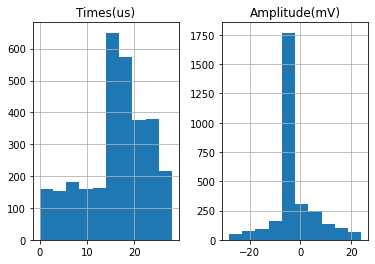

In [69]:
from matplotlib import pyplot
df.hist()
pyplot.show()

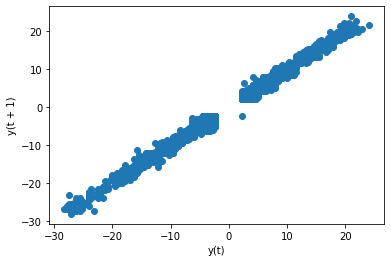

In [70]:
from pandas.plotting import lag_plot
lag_plot(df['Amplitude(mV)'])
pyplot.show()

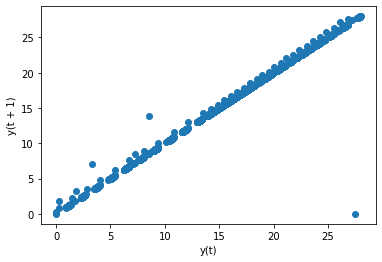

In [71]:
lag_plot(df['Times(us)'])
pyplot.show()

In [74]:
import plotly.express as px
fig = px.scatter(df, x="Times(us)", y="Amplitude(mV)")
fig.show()